In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import os


# To establish connection taing a variable as mydb.
mydb = mysql.connector.connect(host="localhost", 
                               username="root",
                               password="7001340148",
                               database="ecommerce")

# Lets activate the cursor.
cur = mydb.cursor()

# List all unique cities where customer are located.

In [11]:
query = """select distinct(customer_city) from oldcustomers"""

# To execute the query
cur.execute(query)

# Creating a variable named data to fetch all the data from cursor
data = cur.fetchall()
data.head()

AttributeError: 'list' object has no attribute 'head'

# Count the number of orders placed in 2017

In [3]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
data[0][0]
"So total order placed in 2017",data[0][0]

('So total order placed in 2017', 45101)

# Find the total sale per category

In [4]:
query = """ SELECT products.product_category category, round(sum(payments.payment_value),2)  sales
from products
join order_items
on 
products.Product_id=order_items.Product_id
join payments
on payments.order_id=order_items.order_id
group by category; """

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns = ["Categoty","Sales"]) # Giving output column name here "Categoty","Sales"
df

,Categoty,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate total percentage of orders that were paid in installments.

In [5]:
query = """ SELECT (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments
"""
cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customer from each state

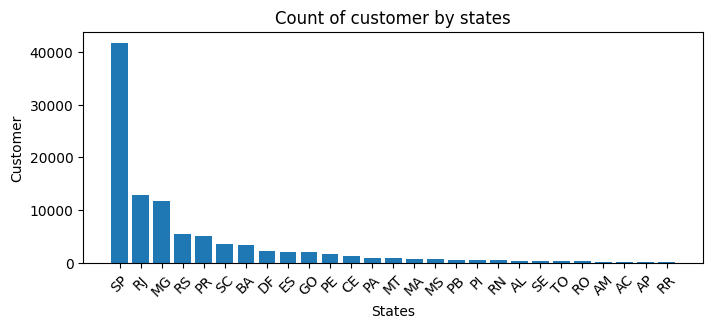

In [6]:
query = """ SELECT customer_state, count(customer_id) from  oldcustomers
group by customer_state;
"""

cur.execute(query)
data = cur.fetchall()

df=pd.DataFrame(data, columns = ["State","Customer_count"])
df=df.sort_values(by= "Customer_count", ascending=False)

plt.figure(figsize=(8,3))
plt.bar(df["State"],df["Customer_count"])
plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Customer")
plt.title("Count of customer by states")
plt.show()

# Calculate number of orders per month in the year 2018

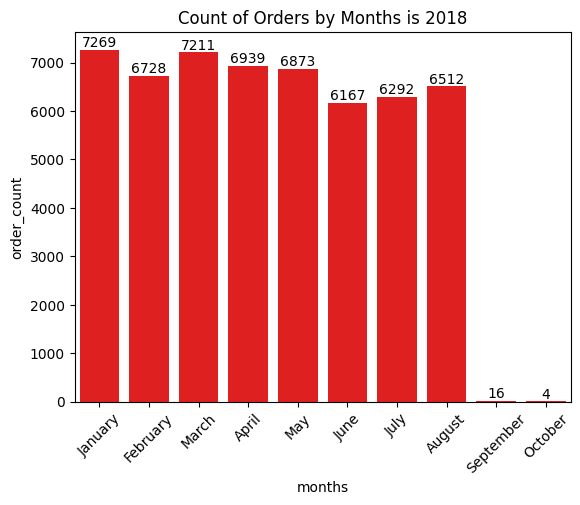

In [7]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"],data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

# Find the average number of products per order, grouped by customer city.

In [8]:
Query="""
with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select oldcustomers.customer_city, round(avg(count_per_order.oc),2) average_orders
from oldcustomers join count_per_order
on oldcustomers.customer_id = count_per_order.customer_id
group by oldcustomers.customer_city order by average_orders desc
"""
cur.execute(Query)
data = cur.fetchall()
df=pd.DataFrame(data, columns =["City","Avg product/order"])
df.head(10)

,City,Avg product/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product catego

In [9]:
Query="""
SELECT upper(products.product_category) category, round((sum(payments.payment_value)/(select sum(Payment_value) from Payments))*100,2)  percentage_distribution
from products
join order_items
on 
products.Product_id=order_items.Product_id
join payments
on payments.order_id=order_items.order_id
group by category order by percentage_distribution desc ;

"""
cur.execute(Query)
data = cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Calculate the total revenue generated by each seller, and rank them by revenue.


In [10]:
Query="""
select Sellers.Seller_id , round(sum(payments.payment_value),2) Revenue
from payments join order_items
on payments.order_id=order_items.order_id
join Sellers 
on Sellers.Seller_id=order_items.Seller_id
group by Seller_id order by Revenue desc;
"""
cur.execute(Query)
data = cur.fetchall()
df=pd.DataFrame(data, columns =["Seller_id","Revenue"])
df.head(10)

,Seller_id,Revenue
0,7c67e1448b00f6e969d365cea6b010ab,507166.91
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
2,4a3ca9315b744ce9f8e9374361493884,301245.27
3,1f50f920176fa81dab994f9023523100,290253.42
4,53243585a1d6dc2643021fd1853d8905,284903.08
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.32
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12
7,955fee9216a65b617aa5c0531780ce60,236322.30
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.23
9,7e93a43ef30c4f03f38b393420bc753a,185134.21
